In [12]:
import yfinance as yf
gold = yf.download('GC=F ', '2022-03-01', '2024-03-01', auto_adjust=True)

print(gold)

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close  Volume
Date                                                                  
2022-03-01  1908.300049  1942.400024  1903.800049  1942.400024     547
2022-03-02  1945.599976  1948.199951  1919.800049  1920.900024     109
2022-03-03  1930.500000  1940.300049  1924.800049  1934.400024     122
2022-03-04  1937.000000  1970.900024  1935.599976  1965.099976      47
2022-03-07  1989.000000  2001.099976  1963.000000  1993.900024    2516
...                 ...          ...          ...          ...     ...
2024-02-23  2026.000000  2038.599976  2014.900024  2038.599976      22
2024-02-26  2034.099976  2035.400024  2024.800049  2028.500000     143
2024-02-27  2035.900024  2035.900024  2034.000000  2034.000000     964
2024-02-28  2029.500000  2037.000000  2024.800049  2033.000000     581
2024-02-29  2034.300049  2049.800049  2034.300049  2045.699951     706

[504 ro

Chuyển Date thành Timestamp

In [13]:

gold['Date'] = gold.index
gold.set_index('Date')
print(gold)

                   Open         High          Low        Close  Volume  \
Date                                                                     
2022-03-01  1908.300049  1942.400024  1903.800049  1942.400024     547   
2022-03-02  1945.599976  1948.199951  1919.800049  1920.900024     109   
2022-03-03  1930.500000  1940.300049  1924.800049  1934.400024     122   
2022-03-04  1937.000000  1970.900024  1935.599976  1965.099976      47   
2022-03-07  1989.000000  2001.099976  1963.000000  1993.900024    2516   
...                 ...          ...          ...          ...     ...   
2024-02-23  2026.000000  2038.599976  2014.900024  2038.599976      22   
2024-02-26  2034.099976  2035.400024  2024.800049  2028.500000     143   
2024-02-27  2035.900024  2035.900024  2034.000000  2034.000000     964   
2024-02-28  2029.500000  2037.000000  2024.800049  2033.000000     581   
2024-02-29  2034.300049  2049.800049  2034.300049  2045.699951     706   

                 Date  
Date         

Tạo thêm các cột MA7, MA25, MA99

In [14]:
# Tính toán và tạo cột cho trung bình động 7 ngày (MA7)
gold['MA7'] = gold['Close'].rolling(window=7).mean()

# Tính toán và tạo cột cho trung bình động 25 ngày (MA25)
gold['MA25'] = gold['Close'].rolling(window=25).mean()

# Tính toán và tạo cột cho trung bình động 99 ngày (MA99)
gold['MA99'] = gold['Close'].rolling(window=99).mean()

# In ra DataFrame để kiểm tra kết quả
print(gold)


                   Open         High          Low        Close  Volume  \
Date                                                                     
2022-03-01  1908.300049  1942.400024  1903.800049  1942.400024     547   
2022-03-02  1945.599976  1948.199951  1919.800049  1920.900024     109   
2022-03-03  1930.500000  1940.300049  1924.800049  1934.400024     122   
2022-03-04  1937.000000  1970.900024  1935.599976  1965.099976      47   
2022-03-07  1989.000000  2001.099976  1963.000000  1993.900024    2516   
...                 ...          ...          ...          ...     ...   
2024-02-23  2026.000000  2038.599976  2014.900024  2038.599976      22   
2024-02-26  2034.099976  2035.400024  2024.800049  2028.500000     143   
2024-02-27  2035.900024  2035.900024  2034.000000  2034.000000     964   
2024-02-28  2029.500000  2037.000000  2024.800049  2033.000000     581   
2024-02-29  2034.300049  2049.800049  2034.300049  2045.699951     706   

                 Date          MA7   

In [15]:
# Thay thế các giá trị NaN bằng 0
gold.fillna(0, inplace=True)

# In ra DataFrame để kiểm tra kết quả
print(gold)


                   Open         High          Low        Close  Volume  \
Date                                                                     
2022-03-01  1908.300049  1942.400024  1903.800049  1942.400024     547   
2022-03-02  1945.599976  1948.199951  1919.800049  1920.900024     109   
2022-03-03  1930.500000  1940.300049  1924.800049  1934.400024     122   
2022-03-04  1937.000000  1970.900024  1935.599976  1965.099976      47   
2022-03-07  1989.000000  2001.099976  1963.000000  1993.900024    2516   
...                 ...          ...          ...          ...     ...   
2024-02-23  2026.000000  2038.599976  2014.900024  2038.599976      22   
2024-02-26  2034.099976  2035.400024  2024.800049  2028.500000     143   
2024-02-27  2035.900024  2035.900024  2034.000000  2034.000000     964   
2024-02-28  2029.500000  2037.000000  2024.800049  2033.000000     581   
2024-02-29  2034.300049  2049.800049  2034.300049  2045.699951     706   

                 Date          MA7   

Chia tập train và tập test

Mô hình PROPHET

In [16]:
# !conda install libpython m2w64-toolchain -c msys2

In [17]:
# !pip install --upgrade wheel

In [18]:
# !pip install pystan

In [19]:
# !conda install -c conda-forge prophet

In [20]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
df = gold
def calculate_ma(df, window, name):
  
    return df[name].rolling(window=window).mean().fillna(0)




def calculate_sar(df, acceleration=0.02, maximum=0.2):
    high = df['High']
    low = df['Low']
    sar = pd.Series(index=df.index)
    sar[0] = low[0]
    trend = 0
    ep = 0
    af = acceleration
    for i in range(1, len(df)):
        if trend == 0:
            if high[i - 1] > high[i] and low[i - 1] > low[i]:
                trend = 1
                sar[i] = low[i]
                ep = high[i]
                af = acceleration
            elif high[i - 1] < high[i] and low[i - 1] < low[i]:
                trend = -1
                sar[i] = high[i]
                ep = low[i]
                af = acceleration
        else:
            if trend == 1:
                if high[i] > ep:
                    sar[i] = sar[i - 1] + af * (ep - sar[i - 1])
                    sar[i] = min(sar[i], low[i - 1])
                    ep = high[i]
                    af = min(af + acceleration, maximum)
                else:
                    trend = -1
                    sar[i] = ep
                    sar[i] = min(sar[i], low[i - 1])
                    sar[i] = min(sar[i], low[i])
                    ep = low[i]
                    af = acceleration
            elif trend == -1:
                if low[i] < ep:
                    sar[i] = sar[i - 1] + af * (ep - sar[i - 1])
                    sar[i] = max(sar[i], high[i - 1])
                    ep = low[i]
                    af = min(af + acceleration, maximum)
                else:
                    trend = 1
                    sar[i] = ep
                    sar[i] = max(sar[i], high[i - 1])
                    sar[i] = max(sar[i], high[i])
                    ep = high[i]
                    af = acceleration
    return sar
# Load data
# Replace 'your_data.csv' with your own data file
df = gold
print(df)
# Preprocess data (fill missing values, convert types, etc.)
# Replace any preprocessing steps here


                   Open         High          Low        Close  Volume  \
Date                                                                     
2022-03-01  1908.300049  1942.400024  1903.800049  1942.400024     547   
2022-03-02  1945.599976  1948.199951  1919.800049  1920.900024     109   
2022-03-03  1930.500000  1940.300049  1924.800049  1934.400024     122   
2022-03-04  1937.000000  1970.900024  1935.599976  1965.099976      47   
2022-03-07  1989.000000  2001.099976  1963.000000  1993.900024    2516   
...                 ...          ...          ...          ...     ...   
2024-02-23  2026.000000  2038.599976  2014.900024  2038.599976      22   
2024-02-26  2034.099976  2035.400024  2024.800049  2028.500000     143   
2024-02-27  2035.900024  2035.900024  2034.000000  2034.000000     964   
2024-02-28  2029.500000  2037.000000  2024.800049  2033.000000     581   
2024-02-29  2034.300049  2049.800049  2034.300049  2045.699951     706   

                 Date          MA7   

In [21]:

# Calculate technical indicators
df['MA_50'] = calculate_ma(df, 50,'Close')


In [22]:

df['Parabolic_SAR'] = calculate_sar(df)
print(df)


                   Open         High          Low        Close  Volume  \
Date                                                                     
2022-03-01  1908.300049  1942.400024  1903.800049  1942.400024     547   
2022-03-02  1945.599976  1948.199951  1919.800049  1920.900024     109   
2022-03-03  1930.500000  1940.300049  1924.800049  1934.400024     122   
2022-03-04  1937.000000  1970.900024  1935.599976  1965.099976      47   
2022-03-07  1989.000000  2001.099976  1963.000000  1993.900024    2516   
...                 ...          ...          ...          ...     ...   
2024-02-23  2026.000000  2038.599976  2014.900024  2038.599976      22   
2024-02-26  2034.099976  2035.400024  2024.800049  2028.500000     143   
2024-02-27  2035.900024  2035.900024  2034.000000  2034.000000     964   
2024-02-28  2029.500000  2037.000000  2024.800049  2033.000000     581   
2024-02-29  2034.300049  2049.800049  2034.300049  2045.699951     706   

                 Date          MA7   

C:\Users\My My\AppData\Local\Temp\ipykernel_33952\2812357118.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sar = pd.Series(index=df.index)


In [23]:
df2=df.copy()
df2['y']=df2['Close']
# Selecting relevant columns (Prophet requires a DataFrame with 'ds' and 'y' columns)
df2 = df2[['Date', 'Close','y', 'Parabolic_SAR']].rename(columns={'Date': 'ds'})
print(df2)



                   ds        Close            y         MA25          MA7  \
Date                                                                        
2022-03-01 2022-03-01  1942.400024  1942.400024     0.000000     0.000000   
2022-03-02 2022-03-02  1920.900024  1920.900024     0.000000     0.000000   
2022-03-03 2022-03-03  1934.400024  1934.400024     0.000000     0.000000   
2022-03-04 2022-03-04  1965.099976  1965.099976     0.000000     0.000000   
2022-03-07 2022-03-07  1993.900024  1993.900024     0.000000     0.000000   
...               ...          ...          ...          ...          ...   
2024-02-23 2024-02-23  2038.599976  2038.599976  2023.431992  2016.000000   
2024-02-26 2024-02-26  2028.500000  2028.500000  2023.511992  2021.457136   
2024-02-27 2024-02-27  2034.000000  2034.000000  2024.079990  2026.014282   
2024-02-28 2024-02-28  2033.000000  2033.000000  2024.451992  2029.085711   
2024-02-29 2024-02-29  2045.699951  2045.699951  2025.723989  2031.685704   

In [24]:
X = df2[['ds', 'Close','y', 'MA7', 'MA25', 'MA99', 'Parabolic_SAR']]
y = df2['y']

# Tạo một điểm chia dữ liệu giả định
split_point = int(len(df2) * 0.7)  # 70% là tập huấn luyện

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

print(len(X_train), len(X_test))


352 152


In [25]:

# Prophet model training
prophet_model = Prophet()
prophet_model.add_regressor('Parabolic_SAR')
prophet_model.add_regressor('MA7')
prophet_model.add_regressor('MA25')
prophet_model.add_regressor('MA99')
prophet_model.fit(df2)



17:08:25 - cmdstanpy - INFO - Chain [1] start processing
17:08:25 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
print(X_test)

                   ds        Close            y          MA7         MA25  \
Date                                                                        
2023-07-26 2023-07-26  1968.900024  1968.900024  1968.371443  1939.375991   
2023-07-27 2023-07-27  1945.400024  1945.400024  1963.828596  1939.859990   
2023-07-28 2023-07-28  1960.400024  1960.400024  1961.385742  1941.767993   
2023-07-31 2023-07-31  1970.500000  1970.500000  1961.700021  1943.823994   
2023-08-01 2023-08-01  1940.699951  1940.699951  1958.328578  1944.503994   
...               ...          ...          ...          ...          ...   
2024-02-23 2024-02-23  2038.599976  2038.599976  2016.000000  2023.431992   
2024-02-26 2024-02-26  2028.500000  2028.500000  2021.457136  2023.511992   
2024-02-27 2024-02-27  2034.000000  2034.000000  2026.014282  2024.079990   
2024-02-28 2024-02-28  2033.000000  2033.000000  2029.085711  2024.451992   
2024-02-29 2024-02-29  2045.699951  2045.699951  2031.685704  2025.723989   

In [27]:

# Make predictions
print(X_test)

                   ds        Close            y          MA7         MA25  \
Date                                                                        
2023-07-26 2023-07-26  1968.900024  1968.900024  1968.371443  1939.375991   
2023-07-27 2023-07-27  1945.400024  1945.400024  1963.828596  1939.859990   
2023-07-28 2023-07-28  1960.400024  1960.400024  1961.385742  1941.767993   
2023-07-31 2023-07-31  1970.500000  1970.500000  1961.700021  1943.823994   
2023-08-01 2023-08-01  1940.699951  1940.699951  1958.328578  1944.503994   
...               ...          ...          ...          ...          ...   
2024-02-23 2024-02-23  2038.599976  2038.599976  2016.000000  2023.431992   
2024-02-26 2024-02-26  2028.500000  2028.500000  2021.457136  2023.511992   
2024-02-27 2024-02-27  2034.000000  2034.000000  2026.014282  2024.079990   
2024-02-28 2024-02-28  2033.000000  2033.000000  2029.085711  2024.451992   
2024-02-29 2024-02-29  2045.699951  2045.699951  2031.685704  2025.723989   

In [28]:
forecast = prophet_model.predict(X_test)
# print(X_train)
print(forecast)

            ds        trend   yhat_lower   yhat_upper  trend_lower  \
0   2023-07-26  1929.673041  1927.611630  1987.704962  1929.673041   
1   2023-07-27  1929.960314  1914.811674  1975.736498  1929.960314   
2   2023-07-28  1930.247587  1916.059750  1975.785505  1930.247587   
3   2023-07-31  1931.109271  1929.113185  1989.188178  1931.109271   
4   2023-08-01  1931.396499  1913.286498  1971.235659  1931.396499   
..         ...          ...          ...          ...          ...   
147 2024-02-23  1953.880442  1984.320059  2047.163118  1953.880442   
148 2024-02-26  1954.029747  1990.887485  2048.463547  1954.029747   
149 2024-02-27  1954.079515  1985.769974  2045.537096  1954.079515   
150 2024-02-28  1954.129283  1985.350918  2043.296442  1954.129283   
151 2024-02-29  1954.179051  1990.350101  2049.992511  1954.179051   

     trend_upper      MA25  MA25_lower  MA25_upper       MA7  ...     weekly  \
0    1929.673041 -0.458830   -0.458830   -0.458830 -3.719505  ... -12.575766   

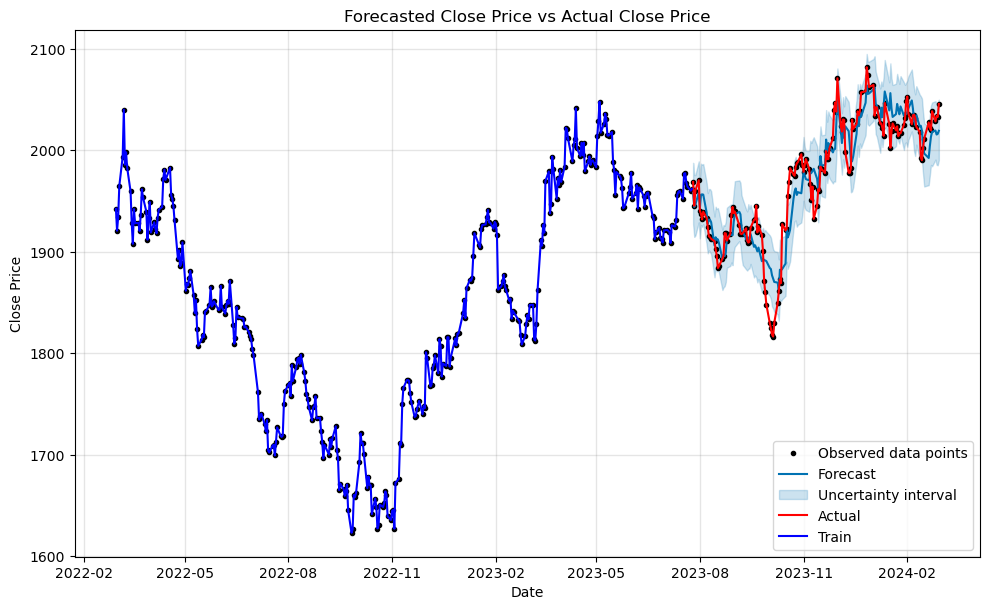

In [29]:
# Visualize results
prophet_model.plot(forecast)

# Plot actual values from y_test
plt.plot(forecast['ds'], y_test, label='Actual', color='red')  # Using forecasted dates for plotting

# Plot training data
plt.plot(X_train.index, y_train, label='Train', color='blue')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Forecasted Close Price vs Actual Close Price')
plt.legend()
plt.show()


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, forecast['yhat'])
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, forecast['yhat'])
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 17.988754496568607
Mean Squared Error (MSE): 520.6434868120459
Root Mean Squared Error (RMSE): 22.81761352140153


In [31]:
y_true = X_test['y']
y_pred = forecast['yhat']
r_squared = r2_score(y_true, y_pred)

print("R-squared:", r_squared)

NameError: name 'r2_score' is not defined